In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
people = pd.read_csv("data/people.csv", parse_dates=['date'])
train = pd.read_csv("data/act_train.csv", parse_dates=['date'])
test = pd.read_csv("data/act_test.csv", parse_dates=['date'])

train = pd.merge(train, people, on='people_id')
test = pd.merge(test, people, on='people_id')
del people

In [5]:
for d in ['date_x', 'date_y']:
    print('Start of ' + d + ': ' + str(train[d].min().date()))
    print('  End of ' + d + ': ' + str(train[d].max().date()))
    print('Range of ' + d + ': ' + str(train[d].max() - train[d].min()) + '\n')

Start of date_x: 2022-07-17
  End of date_x: 2023-08-31
Range of date_x: 410 days 00:00:00

Start of date_y: 2020-05-18
  End of date_y: 2023-08-31
Range of date_y: 1200 days 00:00:00



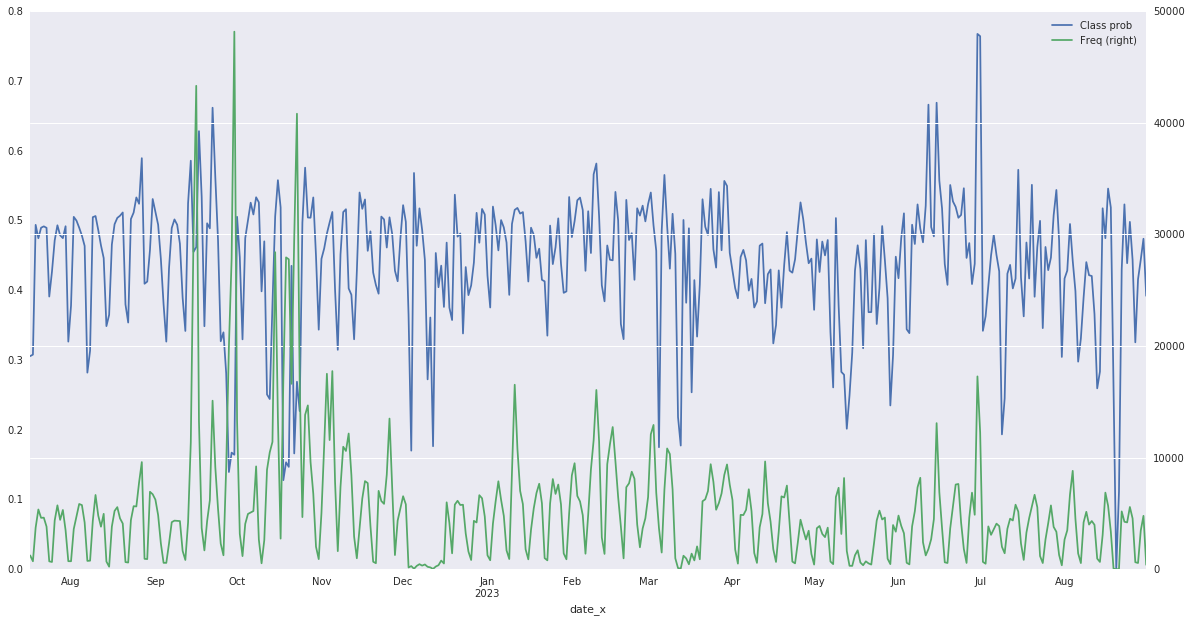

In [7]:
date_x = pd.DataFrame()
date_x['Class prob'] = train.groupby('date_x')['outcome'].mean()
date_x['Freq'] = train.groupby('date_x')['outcome'].size()
date_x.plot(secondary_y='Freq', figsize=(20, 10))

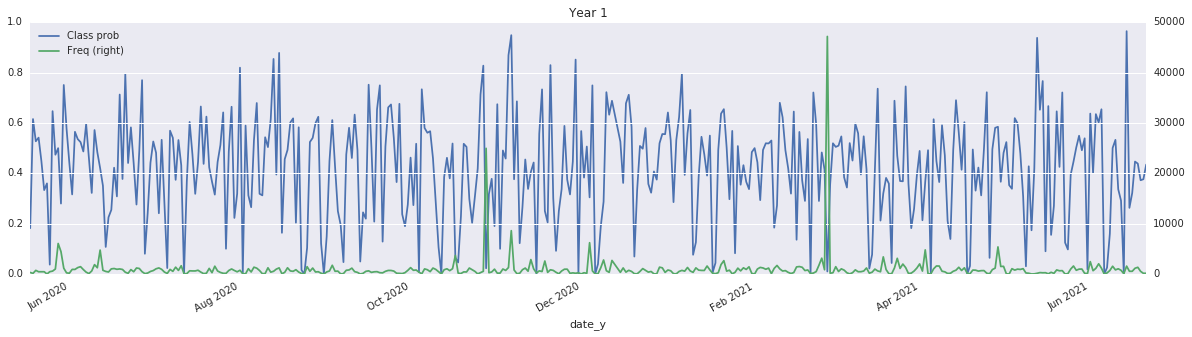

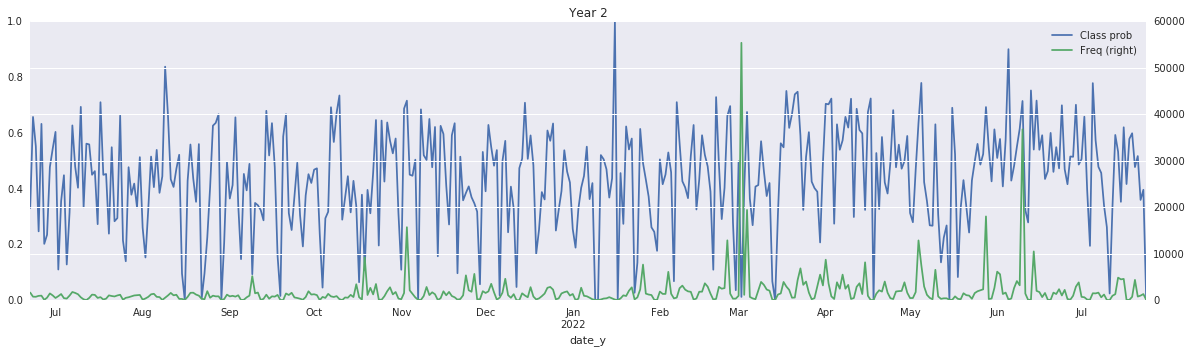

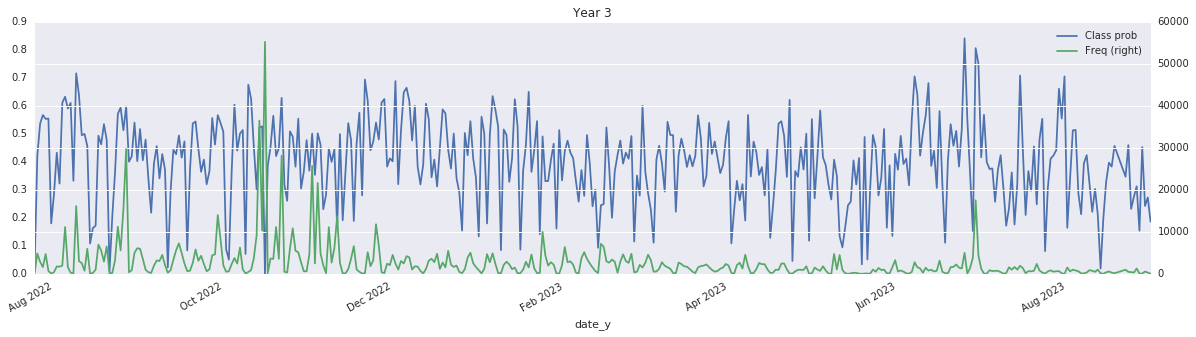

In [13]:
date_y = pd.DataFrame()
date_y['Class prob'] = train.groupby('date_y')['outcome'].mean()
date_y['Freq'] = train.groupby('date_y')['outcome'].size()
i = int(len(date_y) / 3)
date_y[:i].plot(secondary_y='Freq', figsize=(20, 5), title='Year 1')
date_y[i:2*i].plot(secondary_y='Freq', figsize=(20, 5), title='Year 2')
date_y[2*i:].plot(secondary_y='Freq', figsize=(20, 5), title='Year 3')

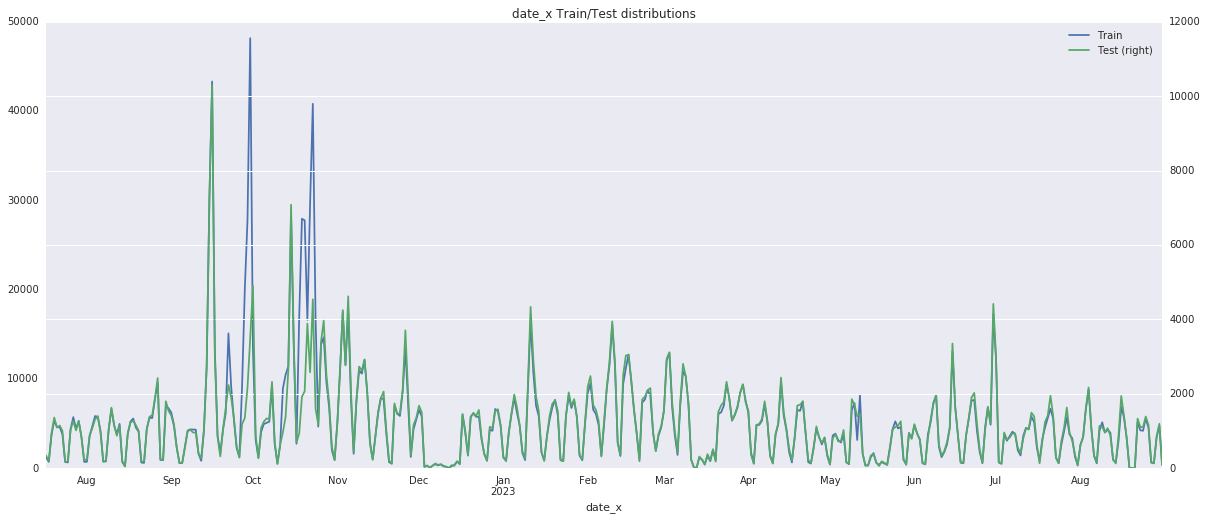

In [14]:
date_x_freq = pd.DataFrame()
date_x_freq['Train'] = train.groupby('date_x')['activity_id'].count()
date_x_freq['Test'] = test.groupby('date_x')['activity_id'].count()
date_x_freq.plot(secondary_y='Test', figsize=(20, 8), title='date_x Train/Test distributions')

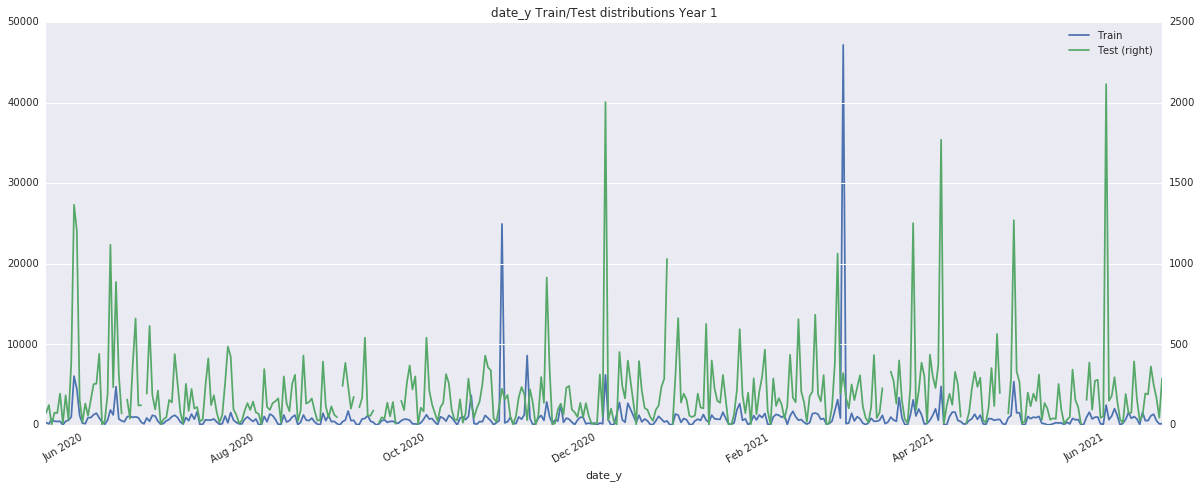

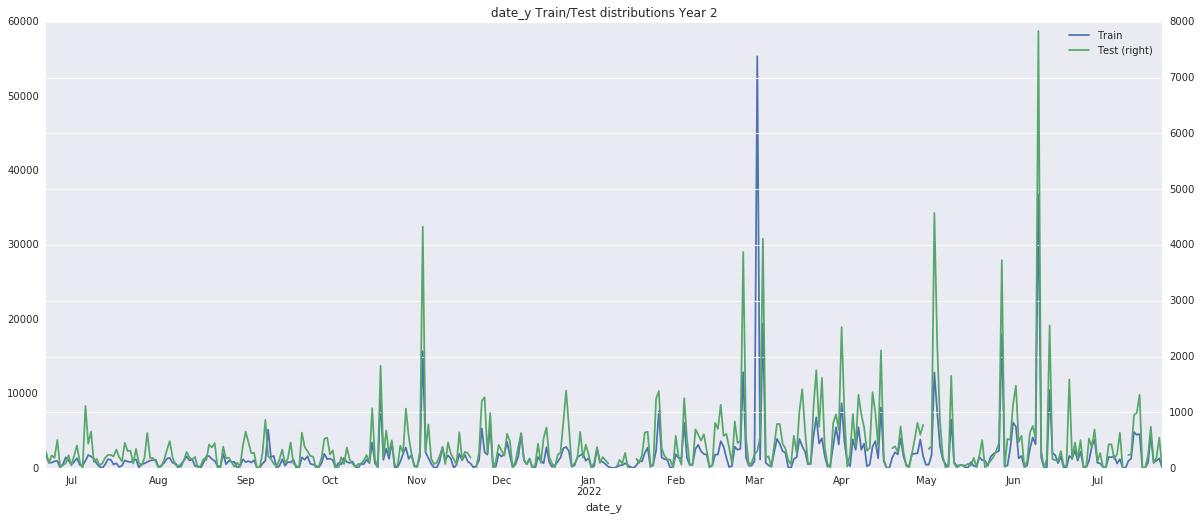

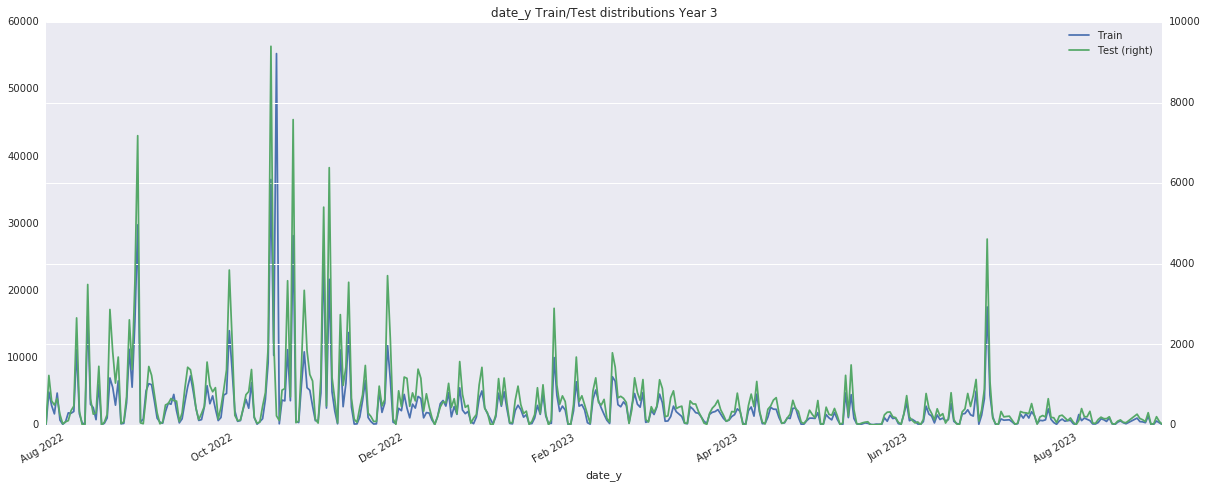

In [18]:
date_y_freq = pd.DataFrame()
date_y_freq['Train'] = train.groupby('date_y')['activity_id'].count()
date_y_freq['Test'] = test.groupby('date_y')['activity_id'].count()
i = int(len(date_y_freq) / 3)
date_y_freq[:i].plot(secondary_y='Test', figsize=(20, 8), title='date_y Train/Test distributions Year 1')
date_y_freq[i:2*i].plot(secondary_y='Test', figsize=(20, 8), title='date_y Train/Test distributions Year 2')
date_y_freq[2*i:].plot(secondary_y='Test', figsize=(20, 8), title='date_y Train/Test distributions Year 3')